### Stock Price Forecasting

Una actividad interesante para ampliar los contenidos vistos en clase es el 
reto de calcular predicciones utilizando cualquier método que conozcáis. En 
el fichero adjunto encontraréis una serie ficticia que representa el valor de 
las acciones de la empresa ACME entre 1977 y 2022. 
- El reto consiste en calcular las predicciones para 2023. INSISTIMOS: 
se puede utilizar cualquier método existente o imaginable.
- La métrica que se utilizará para determinar el algoritmo ganador será 
el ECM. 
- Los/las TRES participantes con mejor resultado recibirán un bonus y 
tendrán que explicar en dos minutos la solución que han propuesto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'C:/Users/Marc/Desktop/Master/Forecasting/Treball_Final/Datos.xlsx'

data = pd.read_excel(file_path)

data.head()


,mes,pernoctacions
0,2024-04-01,4476.1
1,2024-03-01,3692.9
2,2024-02-01,2706.5
3,2024-01-01,2276.2
4,2023-12-01,2524.0


In [3]:
data = data.iloc[::-1]
data.head()

,mes,pernoctacions
303,1999-01-01,922.3
302,1999-02-01,1108.1
301,1999-03-01,1362.5
300,1999-04-01,2391.2
299,1999-05-01,3446.3


In [4]:
data['mes'] = pd.to_datetime(data['mes'])

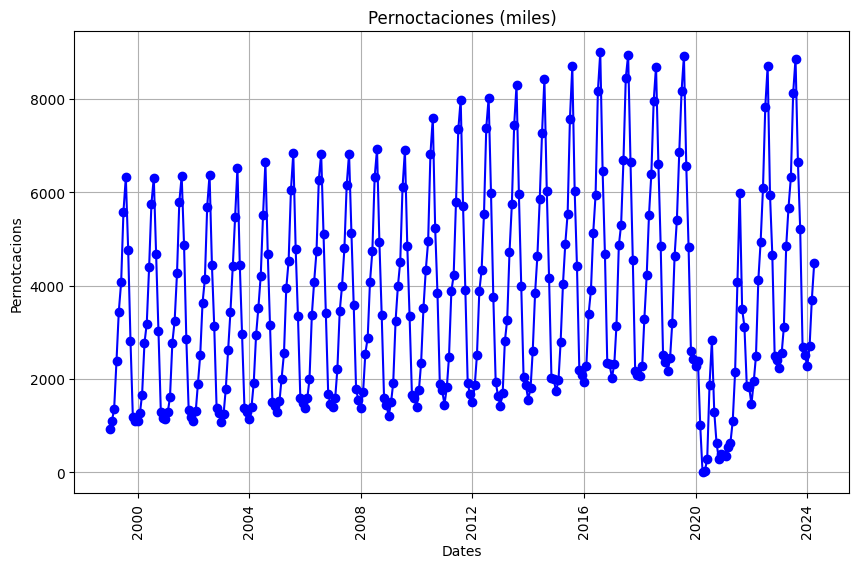

In [5]:
data['mes'] = pd.to_datetime(data['mes'])

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(data['mes'], data['pernoctacions'], marker='o', color='blue')
plt.title("Pernoctaciones (miles)")
plt.xlabel('Dates')
plt.ylabel('Pernotcacions')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [6]:
data_filtered = data[(data['mes'].dt.year < 2017)]

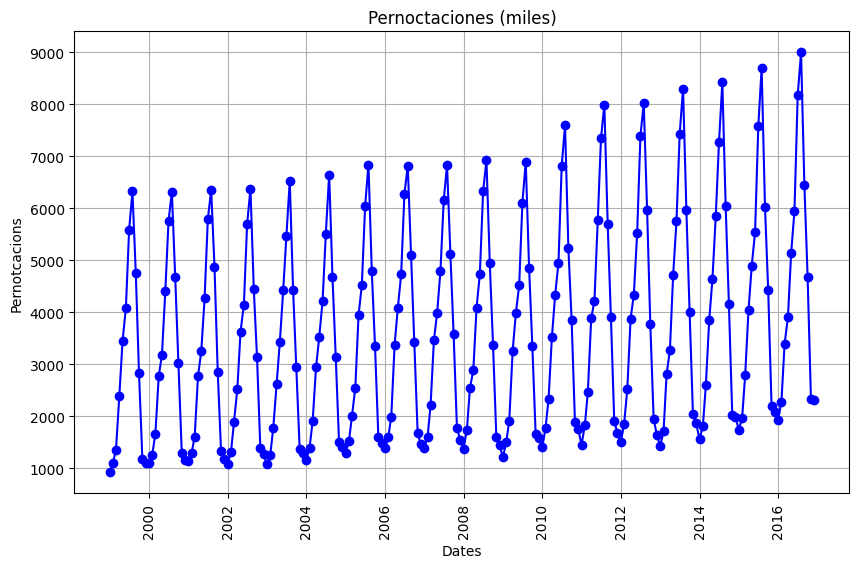

In [7]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(data_filtered['mes'], data_filtered['pernoctacions'], marker='o', color='blue')
plt.title("Pernoctaciones (miles)")
plt.xlabel('Dates')
plt.ylabel('Pernotcacions')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Para ver un poco más con detalle la evolución de los últimos años gráficaremos la serie temporal en un año en concreto. Probaremos de visualizar el 2016:

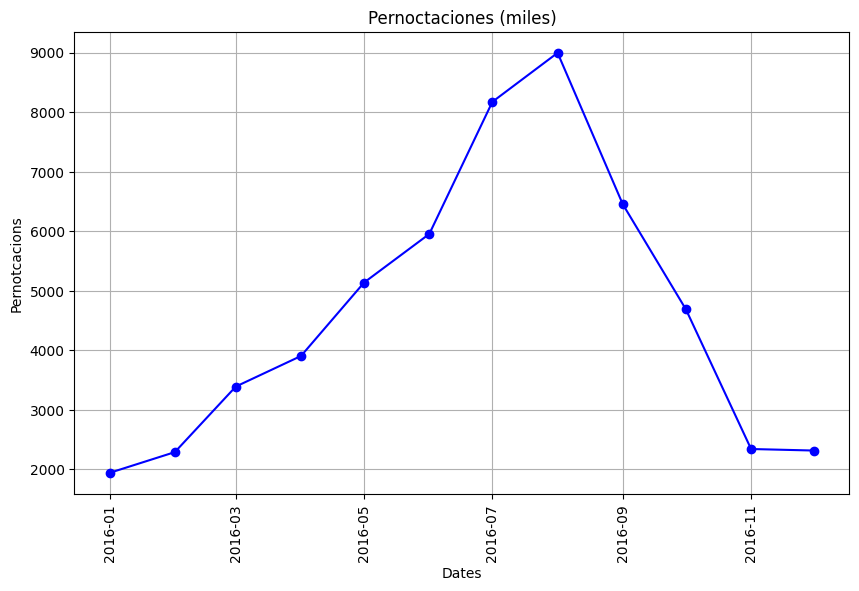

In [8]:
# Filtrar los datos para el año 2016
data_2016 = data_filtered[data_filtered['mes'].dt.year == 2016]

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(data_2016['mes'], 
         data_2016['pernoctacions'], 
         marker='o', color='blue')
plt.title("Pernoctaciones (miles)")
plt.xlabel('Dates')
plt.ylabel('Pernotcacions')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Parece que hay cierta estacionalidad, cada año empieza con una clara tendencia positiva, y tiene un repunte pequeño a finales.

#### Modelo Prophet

Prophet: which was released by Facebook’s Core Data Science team, is an open-source library developed by Facebook and designed for automatic forecasting of univariate time series data.



In [9]:
from prophet import Prophet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.stats import uniform
import numpy as np

In [10]:
data_filtered.head()

,mes,pernoctacions
303,1999-01-01,922.3
302,1999-02-01,1108.1
301,1999-03-01,1362.5
300,1999-04-01,2391.2
299,1999-05-01,3446.3


In [11]:
# Preparar les dades
data_filtered['ds'] = data_filtered['mes']
data_filtered['y'] = data_filtered['pernoctacions']
data = data_filtered[['ds', 'y']]

C:\Users\Marc\AppData\Local\Temp\ipykernel_5740\4027157886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['ds'] = data_filtered['mes']
C:\Users\Marc\AppData\Local\Temp\ipykernel_5740\4027157886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['y'] = data_filtered['pernoctacions']


In [12]:
data.head()

,ds,y
303,1999-01-01,922.3
302,1999-02-01,1108.1
301,1999-03-01,1362.5
300,1999-04-01,2391.2
299,1999-05-01,3446.3


16:34:16 - cmdstanpy - INFO - Chain [1] start processing
16:34:16 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Marc\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


,ds,yhat,yhat_lower,yhat_upper
293,2023-05-31,6803.669150,6459.451378,7142.475082
294,2023-06-30,8200.026038,7863.544643,8537.290160
295,2023-07-31,9142.072688,8812.412464,9459.892110
296,2023-08-31,7036.861552,6723.103048,7337.179702
297,2023-09-30,5550.241722,5216.426647,5881.548406
298,2023-10-31,3682.055148,3324.289111,4013.932017
299,2023-11-30,3514.045509,3164.274590,3833.880548
300,2023-12-31,3327.454498,2984.206535,3647.887695
301,2024-01-31,3607.043861,3285.165495,3961.755666
302,2024-02-29,4026.253306,3699.732994,4364.683801


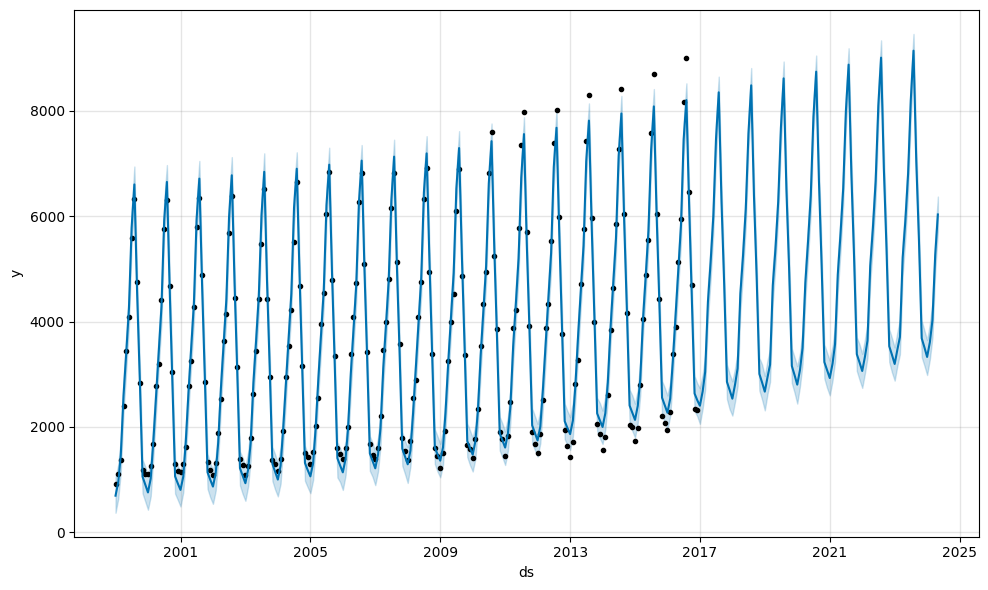

In [13]:
# Ajustar el model
model = Prophet(yearly_seasonality = True, weekly_seasonality = False, daily_seasonality =False)
model.fit(data)

# Predicció dels següents 7 anys
future = model.make_future_dataframe(periods=89, freq='M')
forecast = model.predict(future)

fig = model.plot(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

In [14]:
dataset_predictions = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dataset_predictions.head()

,ds,yhat,yhat_lower,yhat_upper
0,1999-01-01,693.662170,369.023032,1036.272676
1,1999-02-01,952.635777,640.435773,1287.414477
2,1999-03-01,1457.183063,1133.841764,1752.853132
3,1999-04-01,2594.339342,2264.017125,2909.457562
4,1999-05-01,3385.623554,3063.429726,3737.136352


In [15]:
dataset_predictions.tail()

,ds,yhat,yhat_lower,yhat_upper
300,2023-12-31,3327.454498,2984.206535,3647.887695
301,2024-01-31,3607.043861,3285.165495,3961.755666
302,2024-02-29,4026.253306,3699.732994,4364.683801
303,2024-03-31,5261.064718,4942.928534,5580.756272
304,2024-04-30,6032.591095,5718.636432,6372.259939


In [16]:
dataset_predictions.to_excel('prophet_1.xlsx', index=False)

Intentaremos optimizar el modelo observando que parámetros esta usando por defecto, que parecen dar unos resultados relativamente flojos, para probar de ajustarlos un poco.

In [17]:
params = {
    'growth': model.growth,
    'n_changepoints': model.n_changepoints,
    'changepoint_range': model.changepoint_range,
    'yearly_seasonality': model.yearly_seasonality,
    'weekly_seasonality': model.weekly_seasonality,
    'daily_seasonality': model.daily_seasonality,
    'seasonality_mode': model.seasonality_mode,
    'seasonality_prior_scale': model.seasonality_prior_scale,
    'changepoint_prior_scale': model.changepoint_prior_scale,
    'interval_width': model.interval_width,
    'uncertainty_samples': model.uncertainty_samples
}

print("Paràmetres utilitzats pel model:")
for key, value in params.items():
    print(f"{key}: {value}")

Paràmetres utilitzats pel model:
growth: linear
n_changepoints: 25
changepoint_range: 0.8
yearly_seasonality: True
weekly_seasonality: False
daily_seasonality: False
seasonality_mode: additive
seasonality_prior_scale: 10.0
changepoint_prior_scale: 0.05
interval_width: 0.8
uncertainty_samples: 1000


In [18]:
from mango import scheduler, Tuner
from sklearn.metrics import mean_absolute_percentage_error as mape

In [19]:
# Dividir les dades en entrenament i prova
train_size = int(len(data) * 0.8)
train_df = data[:train_size]
test_df = data[train_size:]
test_size = len(test_df)

# Definir la funció objectiva per Mango
def objective_function(args_list):
    global train_df, test_df
    
    params_evaluated = []
    results = []
    
    for params in args_list:
        try:
            model = Prophet(**params)
            model.fit(train_df)
            future = model.make_future_dataframe(periods=test_size, freq='M')
            forecast = model.predict(future)
            predictions_tuned = forecast.tail(test_size)
            error = mape(test_df['y'], predictions_tuned['yhat'])   
            
            params_evaluated.append(params)
            results.append(error)
        except Exception as e:
            print(f"Exception raised for {params}: {e}")
            params_evaluated.append(params)
            results.append(25.0)  # Assignar una pèrdua alta per a regions d'espai amb excepcions
        
    return params_evaluated, results

In [20]:
param_space = {
    'growth': ['linear', 'flat'],
    'n_changepoints': range(10, 40, 2),
    'changepoint_range': [0.6, 0.7, 0.8, 0.9, 1.0],
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'daily_seasonality': [True, False],
    'seasonality_mode': ['additive', 'multiplicative'],
    'seasonality_prior_scale': range(5, 40, 5),
    'changepoint_prior_scale': [0.01, 0.05, 0.1],
    'interval_width': [0.2, 0.4, 0.6, 0.8, 1],
    'uncertainty_samples': [250, 500, 1000, 1500, 2000]
}

conf_Dict = {
    'initial_random': 10,
    'num_iteration': 50
}

tuner = Tuner(param_space, objective_function, conf_Dict)

# Executar l'optimització
results = tuner.minimize()
best_params = results['best_params']
best_loss = results['best_objective']

16:34:19 - cmdstanpy - INFO - Chain [1] start processing
16:34:20 - cmdstanpy - INFO - Chain [1] done processing
16:34:20 - cmdstanpy - INFO - Chain [1] start processing
16:34:20 - cmdstanpy - INFO - Chain [1] done processing
16:34:20 - cmdstanpy - INFO - Chain [1] start processing
16:34:20 - cmdstanpy - INFO - Chain [1] done processing
16:34:20 - cmdstanpy - INFO - Chain [1] start processing
16:34:20 - cmdstanpy - INFO - Chain [1] done processing
16:34:20 - cmdstanpy - INFO - Chain [1] start processing
16:34:21 - cmdstanpy - INFO - Chain [1] done processing
16:34:21 - cmdstanpy - INFO - Chain [1] start processing
16:34:21 - cmdstanpy - INFO - Chain [1] done processing
16:34:21 - cmdstanpy - INFO - Chain [1] start processing
16:34:21 - cmdstanpy - INFO - Chain [1] done processing
16:34:21 - cmdstanpy - INFO - Chain [1] start processing
16:34:21 - cmdstanpy - INFO - Chain [1] done processing
16:34:22 - cmdstanpy - INFO - Chain [1] start processing
16:34:22 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/50 [00:00<?, ?it/s]

16:34:35 - cmdstanpy - INFO - Chain [1] start processing
16:34:35 - cmdstanpy - INFO - Chain [1] done processing
16:34:49 - cmdstanpy - INFO - Chain [1] start processing
16:34:49 - cmdstanpy - INFO - Chain [1] done processing
16:35:04 - cmdstanpy - INFO - Chain [1] start processing
16:35:04 - cmdstanpy - INFO - Chain [1] done processing
16:35:18 - cmdstanpy - INFO - Chain [1] start processing
16:35:18 - cmdstanpy - INFO - Chain [1] done processing
16:35:33 - cmdstanpy - INFO - Chain [1] start processing
16:35:33 - cmdstanpy - INFO - Chain [1] done processing
16:35:48 - cmdstanpy - INFO - Chain [1] start processing
16:35:48 - cmdstanpy - INFO - Chain [1] done processing
16:36:00 - cmdstanpy - INFO - Chain [1] start processing
16:36:00 - cmdstanpy - INFO - Chain [1] done processing
16:36:13 - cmdstanpy - INFO - Chain [1] start processing
16:36:13 - cmdstanpy - INFO - Chain [1] done processing
16:36:25 - cmdstanpy - INFO - Chain [1] start processing
16:36:25 - cmdstanpy - INFO - Chain [1]

In [31]:
print("Mejores parámetros:", best_params)
print("Mejor pérdida:", best_loss)

Mejores parámetros: {'changepoint_prior_scale': 0.01, 'changepoint_range': 1.0, 'daily_seasonality': False, 'growth': 'linear', 'interval_width': 1, 'n_changepoints': 28, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 10, 'uncertainty_samples': 2000, 'weekly_seasonality': False, 'yearly_seasonality': True}
Mejor pérdida: 0.04655716589515302


: 

16:51:05 - cmdstanpy - INFO - Chain [1] start processing
16:51:05 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
293,2023-05-31,7294.546727,6703.425419,7935.886991
294,2023-06-30,9678.948629,9066.741157,10363.296107
295,2023-07-31,10743.555452,10135.958973,11393.785892
296,2023-08-31,7616.045581,6980.465971,8343.126928
297,2023-09-30,5272.382688,4528.697319,5813.307238
298,2023-10-31,2648.751040,2035.775082,3236.337655
299,2023-11-30,2443.528226,1927.351129,3014.474765
300,2023-12-31,2158.038150,1515.512125,2755.601503
301,2024-01-31,2535.940657,1943.110304,3193.403630
302,2024-02-29,3231.285847,2634.127023,3847.044976


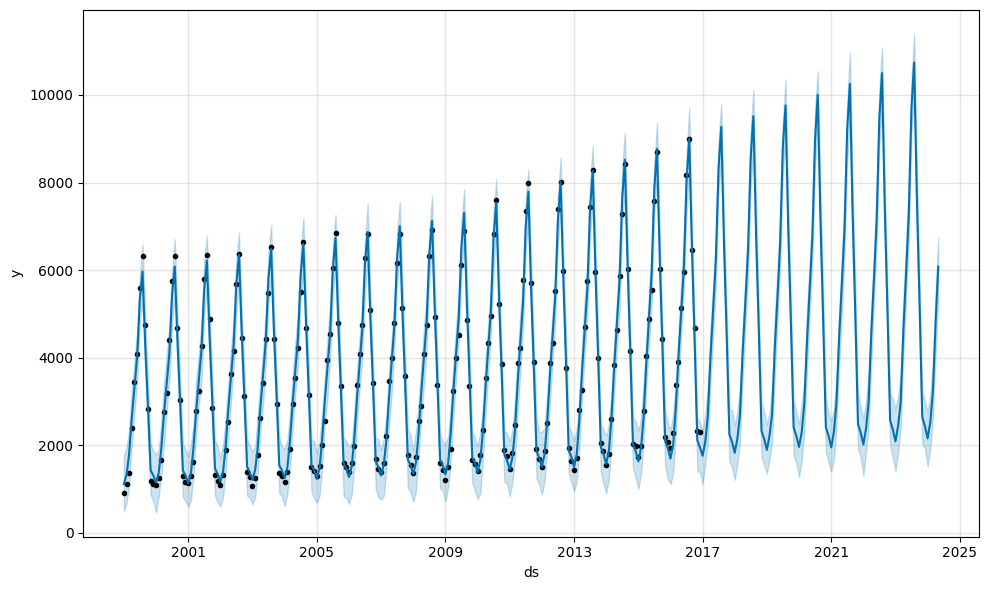

In [27]:
# Crear el model amb els millors paràmetres
model = Prophet(**best_params)
model.fit(data)

# Predir els propers anys
future = model.make_future_dataframe(periods=89, freq='M')
forecast = model.predict(future)

fig = model.plot(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

In [28]:
dataset_predictions_2 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dataset_predictions_2.tail()

,ds,yhat,yhat_lower,yhat_upper
300,2023-12-31,2158.038150,1515.512125,2755.601503
301,2024-01-31,2535.940657,1943.110304,3193.403630
302,2024-02-29,3231.285847,2634.127023,3847.044976
303,2024-03-31,4818.045462,4117.519953,5547.901357
304,2024-04-30,6081.602004,5329.487338,6737.464424


In [30]:
dataset_predictions_2.to_excel('prophet_2.xlsx', index=False)